<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Machine-Learning/blob/master/4_6_Supervised_Learning_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Networks**

A family of algorithms known as neural networks has recently seen a revival under the name “deep learning.” While deep learning shows great promise in many machine learning applications, deep learning algorithms are often tailored very carefully to a specific use case. Here, we will only discuss some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.

**The neural Network Model**

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision. Remember that the prediction by a linear regressor is given as: 

 ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

In plain English, ŷ is a weighted sum of the input features x[0] to x[p], weighted by the learned coefficients w[0] to w[p]. We could visualize this graphically as shown in

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=328bc7a80e26a0ccac16577cfe7dfbc966e2917be395b511ee33bd21d9b68e64
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


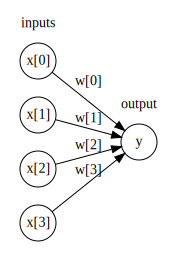

In [1]:
!pip install mglearn
import mglearn

display(mglearn.plots.plot_logistic_regression_graph())

Here, each node on the left represents an input feature, the connecting lines represent the learned coefficients, and the node on the right represents the output, which is a weighted sum of the inputs.

In an MLP this process of computing weighted sums is repeated multiple times, first computing hidden units that represent an intermediate processing step, which are again combined using weighted sums to yield the final result.

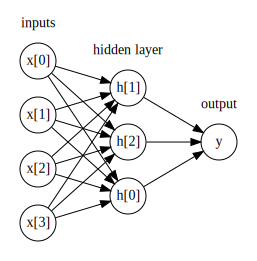

In [2]:
display(mglearn.plots.plot_single_hidden_layer_graph())

This model has a lot more coefficients (also called weights) to learn: there is one between every input and every hidden unit (which make up the hidden layer), and one between every unit in the hidden layer and the output.

Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model, we need one extra trick. After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result usually the rectifying nonlinearity (also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of this function is then used in the weighted sum that computes the output, ŷ. The relu cuts off values below zero, while tanh saturates to –1 for low input values and +1 for high input values. Either nonlinear function allows the neural network to learn much more complicated functions than a linear model could:

Text(0, 0.5, 'relu(x), tanh(x)')

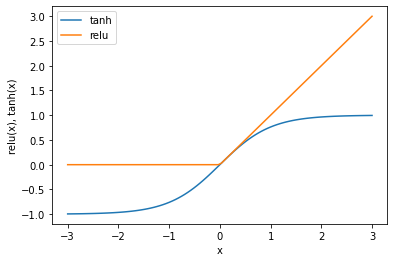

In [4]:
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh") 
plt.plot(line, np.maximum(line, 0), label="relu") 
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

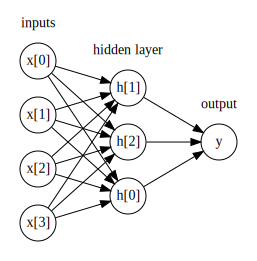

In [5]:
display(mglearn.plots.plot_single_hidden_layer_graph())

For the above neural architechture

h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0]) 

h[1] = tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1]) 

h[2] = tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[2]) ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b


Here, w are the weights between the input x and the hidden layer h, and v are the weights between the hidden layer h and the output ŷ. The weights v and w are learned from data, x are the input features, ŷ is the computed output, and h are intermediate computations. An important parameter that needs to be set by the user is the number of nodes in the hidden layer.

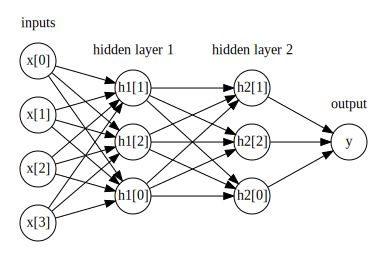

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

**Tuning neural networks**

Let’s look into the workings of the MLP by applying the MLPClassifier to the two_moons dataset

Text(0, 0.5, 'Feature 1')

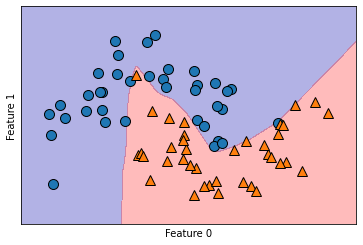

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset. We can reduce the number (which reduces the complexity of the model) and still get a good result

Text(0, 0.5, 'Feature 1')

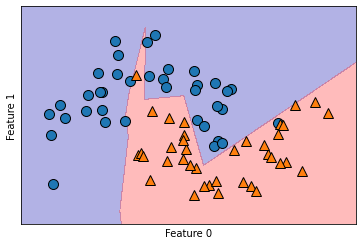

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]) 
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With a single hidden layer, this means the decision function will be made up of 10 straight line segments. If we want a smoother decision boundary, we could add more hidden units, add a second hidden layer , or use the tanh nonlinearity.

Text(0, 0.5, 'Feature 1')

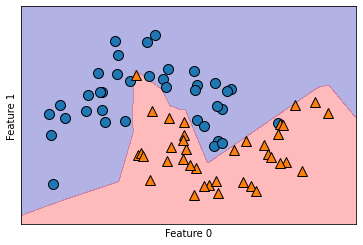

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

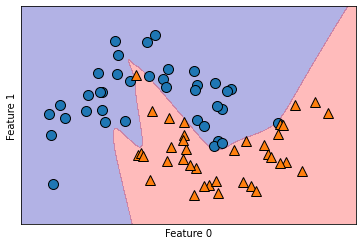

In [10]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


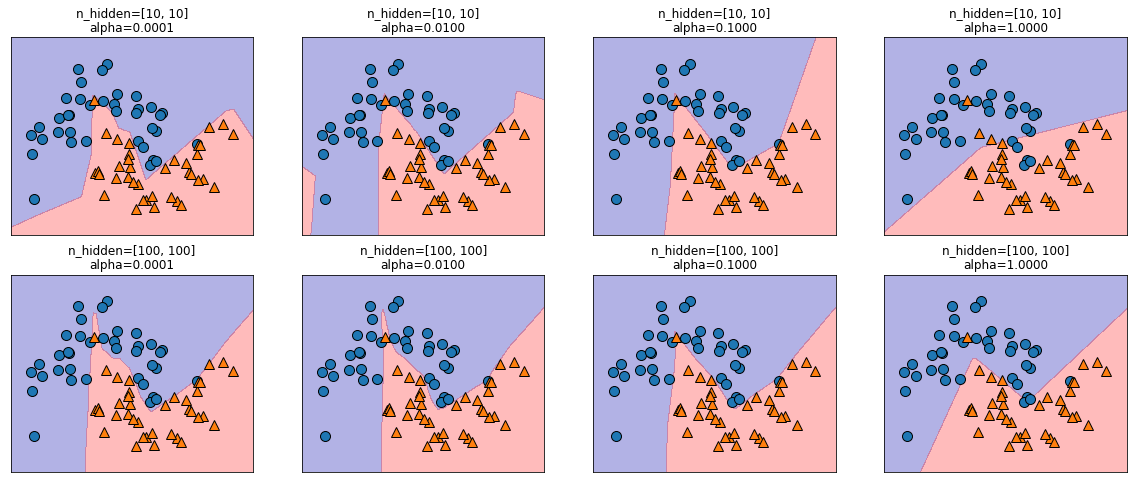

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0,
    hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],alpha=alpha) 
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) 
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax) 
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

To get a better understanding of neural networks on real-world data, let’s apply the MLPClassifier to the Breast Cancer dataset. We start with the default parameters:

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42) 
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the earlier SVC example, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements. 

In [13]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set 
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set 
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0) 
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling, and already quite competitive. We got a warning from the model, though, that tells us that the maximum number of iterations has been reached. This is part of the adam algorithm for learning the model, and tells us that we should increase the number of iterations:

In [14]:
mlp = MLPClassifier(max_iter=1000, random_state=0) 
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


**Strengths, weaknesses, and parameters**

Neural networks have reemerged as state-of-the-art models in many applications of machine learning. One of their main advantages is that they are able to capture infor‐ mation contained in large amounts of data and build incredibly complex models. Given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regres‐ sion tasks).